Stuart Rossiter, C00284845

# Licensing
Linear Regression on the January 2017 dataset of Lichess Games
Copyright (C) 2025 Stuart Rossiter

This program is free software: you can redistribute it and/or modify
it under the terms of the GNU General Public License as published by
the Free Software Foundation, either version 3 of the License, or
(at your option) any later version.

This program is distributed in the hope that it will be useful,
but WITHOUT ANY WARRANTY; without even the implied warranty of
MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.  See the
GNU General Public License for more details.

You should have received a copy of the GNU General Public License
along with this program.  If not, see <https://www.gnu.org/licenses/>.

# Linear Regression - Is Lichess Matchmaking fair?

The relationship between the elo of two players can be used to determine the viability of the matchmaking system on Lichess.
If there is a strong relation, the matchmaking pits players of similar elos against each other. This is what we want to see.
A weak or no relation signifies a poor matchmaking attempt by Lichess.

First, we must take in and clean the data. There are over 10 million games in the acquired dataset. Of these games, a sample of ~300,000 games has been taken. For this regression, only the white_elo and black_elo will be needed.

In [2]:
import pandas
from sklearn.model_selection import train_test_split
import numpy as np

data = pandas.read_csv("Lichess_Games_Sample.csv")

black_elo = data["black_elo"].values
white_elo = data["white_elo"].values

train_black_elo, test_black_elo, train_white_elo, test_white_elo = train_test_split(black_elo, white_elo, train_size=0.7)

Next, we fit the data to a model.

In [3]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)

model.fit(train_white_elo[:, np.newaxis], train_black_elo)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


Now that we have our model, we can plot it.

Text(0, 0.5, 'White Elo')

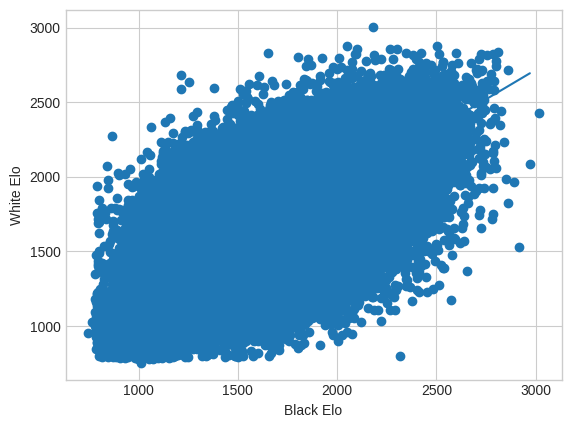

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8-whitegrid')

xfit = np.linspace(train_black_elo.min(), train_black_elo.max())
yfit = model.predict(xfit[:, np.newaxis])

plt.scatter(black_elo, white_elo)
plt.plot(xfit, yfit)
plt.xlabel('Black Elo')
plt.ylabel('White Elo')

There's a lot of variance, but there seems to be some correlation. Let's check out the test data. We will get the average elo difference from the predicted to the actual elo of white, given black's elo.

In [7]:
predicted_white_elo = model.predict(test_black_elo[:, np.newaxis])

difference = 0
for i in range(0, predicted_white_elo.size):
    difference += predicted_white_elo[i] - test_white_elo[i]
difference = difference / predicted_white_elo.size

print(difference)

-1.9300946113083572


As we can see, the model averages a prediction of 1.9 elo lower than the actual elo. This is a very miniscule difference, so the model is fairly reasonable for the given dataset. Next, let's calculate the R value.

In [12]:
from sklearn.metrics import r2_score
from math import sqrt

r_squared = r2_score(test_white_elo, predicted_white_elo)
r_score = sqrt(r_squared) * np.sign(model.coef_[0])
print("R Score: " + str(r_score))
print("R Squared Score: " + str(r_squared))

R Score: 0.7840150425103173
R Squared Score: 0.6146795868824546


The R^2 score, of ~0.615, means that ~61.5% of the variance of the dependent variable, White Elo, can be explained by the dependent variable, Black Elo. The R score, A.K.A. the correlation coefficient, shows the linear relation between Black Elo and White Elo. Naturally, there is a strong relation between the two.

# Conclusion
Given the above data and model, I believe it is fair to say that the matchmaking of Lichess is of suitable quality. There is a strong coefficient between the Black Elo and White Elo, and the trained model can fairly accurately predict Elo.